In [447]:
import pandas as pd
import numpy as np
import string
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [448]:
df = pd.read_csv('data/data.csv', encoding='latin-1')

In [449]:
print(len(df))

1491


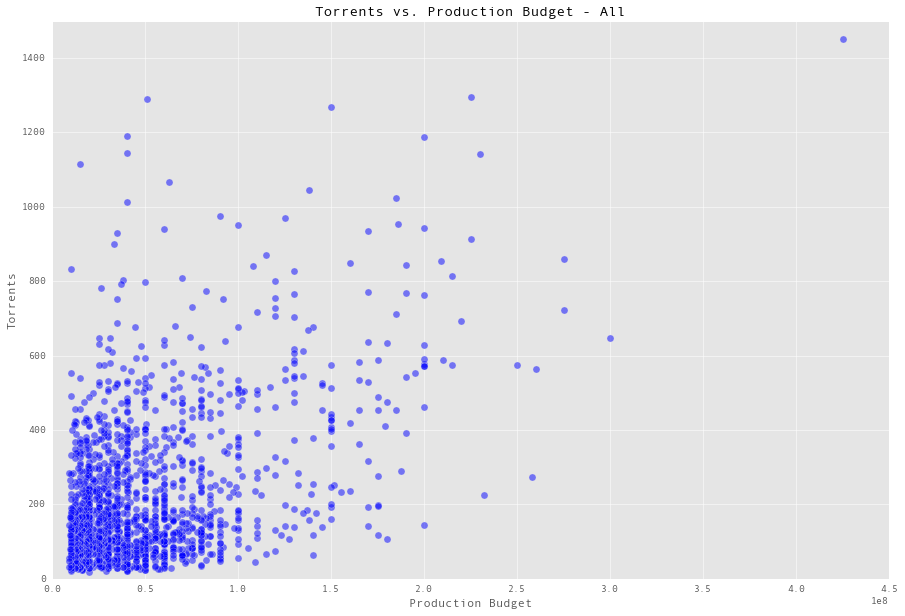

In [450]:
plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - All')
plt.scatter(df['Prod_Budget'], df['Total_Torrents'], alpha=0.5, s=50)

In [451]:
# unique list of grouped genres as a string
unq_genres = df['Genre'].unique()
unq_genres = unq_genres.tolist()

# unique list of grouped genres as a list of genres
lst_grp_genres = []
for lst in unq_genres:
    temp = []
    for genre in lst.split(','):
         temp.append(genre)
    lst_grp_genres.append(temp)
    
#print(len(lst_grp_genres))
#print(lst_grp_genres[:10])
print(len(unq_genres))
print(unq_genres[:10])

227
['Action, Adventure, Fantasy', 'Action, Adventure, Thriller', 'Action, Adventure, Drama', 'Action, Adventure, Sci-Fi', 'Animation, Adventure, Comedy', 'Action, Adventure', 'Adventure, Family, Fantasy', 'Action, Adventure, Comedy', 'Action, Sci-Fi', 'Drama, Romance']


In [452]:
# unique list of individual genres
ind_genre = set()

for lst in unq_genres:
    for genre in lst.split(','):
        ind_genre.add(genre.strip())
ind_genre = sorted(ind_genre)

print(len(ind_genre))
print(ind_genre)

20
['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']


In [453]:
# dictionary - count of genre occurences
count = defaultdict(lambda:0)

for genre in ind_genre:
    count[genre] = df.Genre.str.contains(genre).sum()

import operator
srt = sorted(count.items(), key=operator.itemgetter(1))
srt = srt[::-1]
print(srt)

[('Drama', 612), ('Comedy', 566), ('Action', 518), ('Adventure', 345), ('Crime', 328), ('Thriller', 296), ('Romance', 232), ('Horror', 161), ('Sci-Fi', 159), ('Mystery', 151), ('Fantasy', 143), ('Family', 121), ('Biography', 66), ('Animation', 63), ('Sport', 51), ('Music', 45), ('History', 31), ('War', 23), ('Western', 13), ('Musical', 9)]


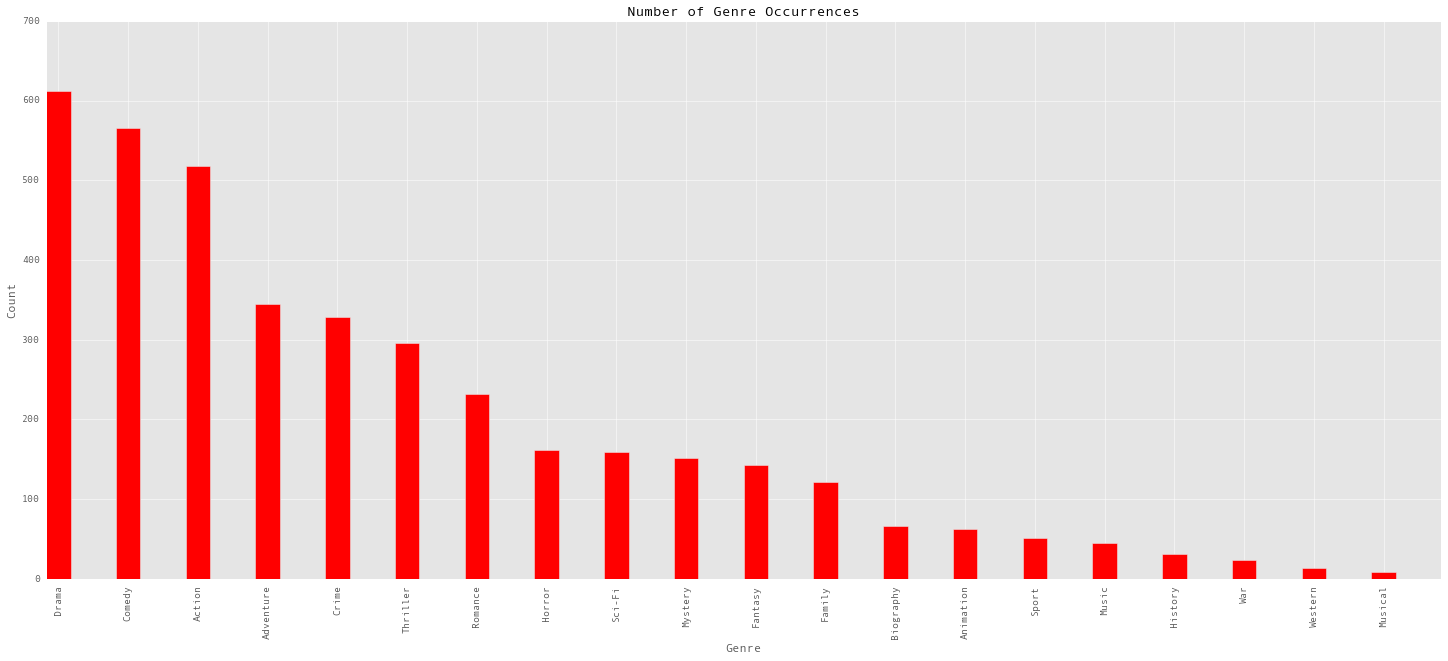

[('Drama', 612), ('Comedy', 566), ('Action', 518), ('Adventure', 345), ('Crime', 328), ('Thriller', 296), ('Romance', 232), ('Horror', 161), ('Sci-Fi', 159), ('Mystery', 151), ('Fantasy', 143), ('Family', 121), ('Biography', 66), ('Animation', 63), ('Sport', 51), ('Music', 45), ('History', 31), ('War', 23), ('Western', 13), ('Musical', 9)]


In [454]:
plt.figure(figsize=(25,10))

ind = np.arange(len(count)) # the x locations for the groups
width = 0.35 # the width of the bars

bar_genre = [genre for genre, count in srt]
bar_count = [count for genre, count in srt]

plt.bar(ind, bar_count, width, color='r')

plt.ylabel('Count')
plt.xlabel('Genre')
plt.title('Number of Genre Occurrences')
plt.xticks(ind + width/2., (bar_genre), rotation='vertical')
plt.yticks(np.arange(0, 701, 100))

plt.show()
print(srt)

In [455]:
# return tuple of (string, list)
tup_lst = []
for genre_gp in unq_genres:
    temp = []
    for genre in genre_gp.split():
        temp.append(genre)
    tup_lst.append((genre_gp, temp))

In [456]:
def srch_lst(term, t_lst):
    srch = []
    for st, lst in t_lst:
        if term in st:
            srch.append(st)
    return srch
# print(srch_lst('Comedy', tup_lst))

612


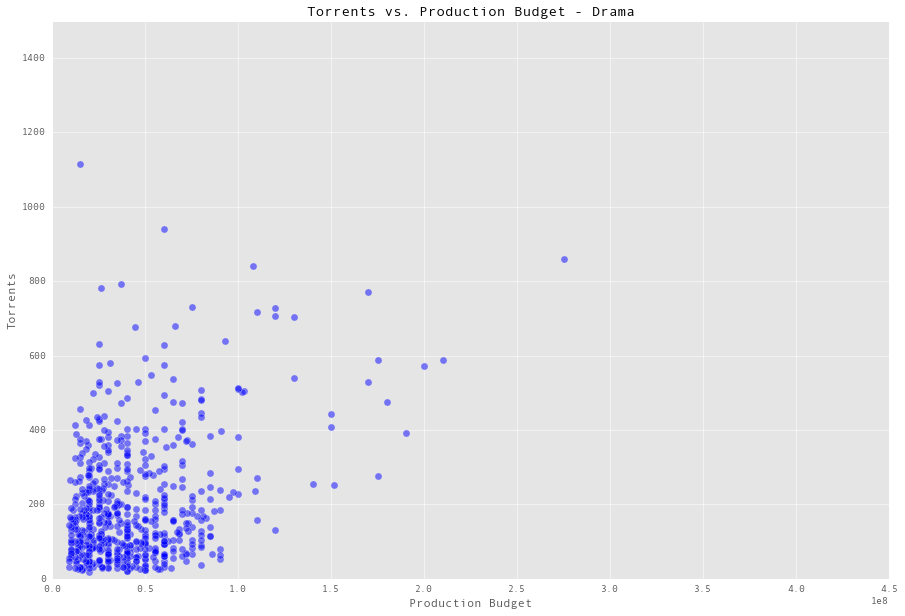

In [457]:
term = 'Drama'
df_a = df.loc[df['Genre'].isin(srch_lst(term, tup_lst))]
print(len(df_a))

plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - {0}'.format(term))
plt.scatter(df_a['Prod_Budget'], df_a['Total_Torrents'], alpha=0.5, s=50)

566


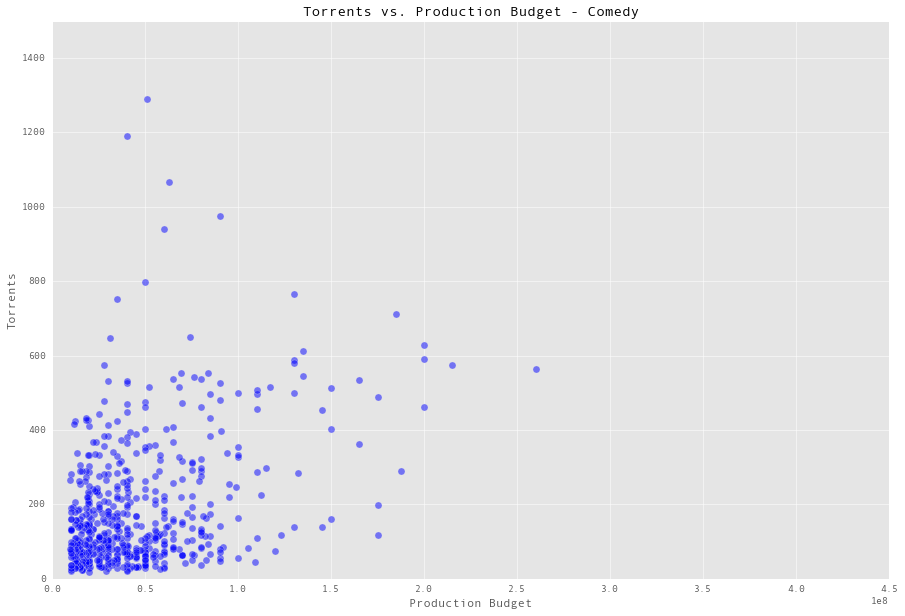

In [458]:
term = 'Comedy'
df_a = df.loc[df['Genre'].isin(srch_lst(term, tup_lst))]
print(len(df_a))

plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - {0}'.format(term))
plt.scatter(df_a['Prod_Budget'], df_a['Total_Torrents'], alpha=0.5, s=50)

518


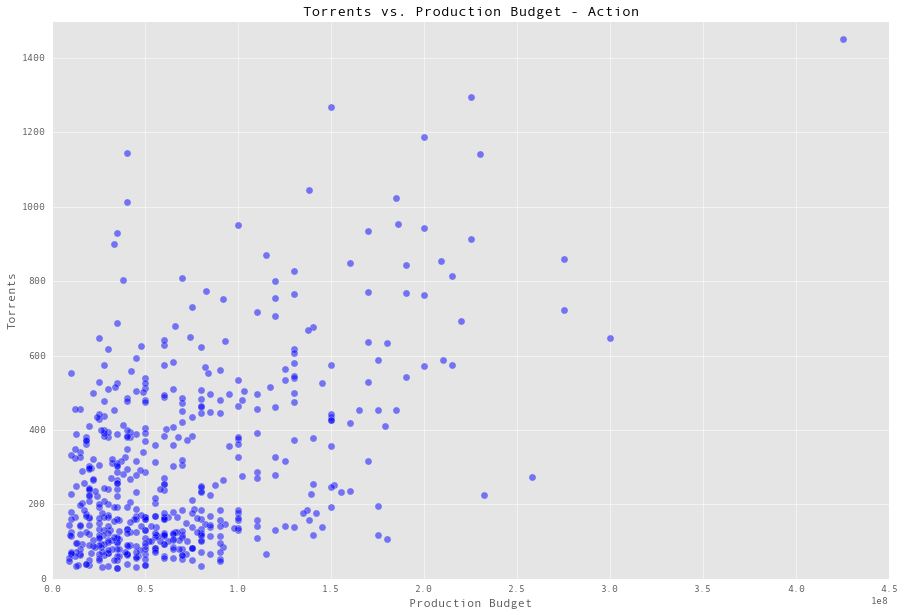

In [459]:
term = 'Action'
df_a = df.loc[df['Genre'].isin(srch_lst(term, tup_lst))]
print(len(df_a))

plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - {0}'.format(term))
plt.scatter(df_a['Prod_Budget'], df_a['Total_Torrents'], alpha=0.5, s=50)

In [460]:
df['Genre'].value_counts()

Comedy                          68
Comedy, Romance                 67
Action, Crime, Drama            58
Comedy, Drama, Romance          49
Action, Comedy, Crime           40
Action, Adventure, Sci-Fi       40
Crime, Drama, Thriller          40
Action, Crime, Thriller         38
Animation, Adventure, Comedy    32
Action, Adventure, Comedy       29
Drama, Romance                  29
Action, Adventure, Drama        24
Action, Adventure, Fantasy      23
Action, Adventure, Thriller     23
Crime, Drama, Mystery           23
Comedy, Drama                   21
Horror, Mystery, Thriller       18
Horror, Mystery                 18
Action, Drama, Thriller         17
Comedy, Crime                   17
Drama                           17
Adventure, Comedy, Family       16
Horror                          16
Comedy, Family, Fantasy         15
Comedy, Drama, Family           14
Comedy, Family                  14
Biography, Drama, History       13
Adventure, Family, Fantasy      13
Crime, Thriller     

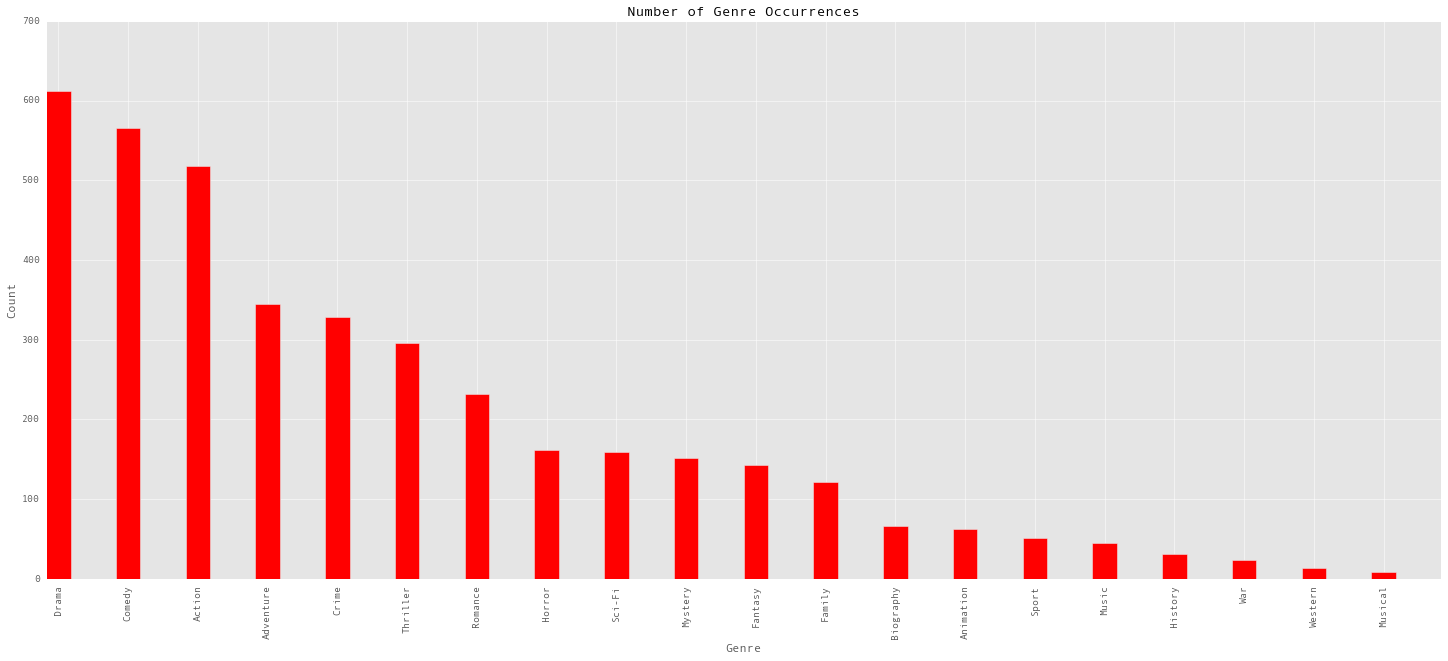

[('Drama', 612), ('Comedy', 566), ('Action', 518), ('Adventure', 345), ('Crime', 328), ('Thriller', 296), ('Romance', 232), ('Horror', 161), ('Sci-Fi', 159), ('Mystery', 151), ('Fantasy', 143), ('Family', 121), ('Biography', 66), ('Animation', 63), ('Sport', 51), ('Music', 45), ('History', 31), ('War', 23), ('Western', 13), ('Musical', 9)]


In [461]:
plt.figure(figsize=(25,10))

ind = np.arange(len(count)) # the x locations for the groups
width = 0.35 # the width of the bars

bar_genre = [genre for genre, count in srt]
bar_count = [count for genre, count in srt]

plt.bar(ind, bar_count, width, color='r')

plt.ylabel('Count')
plt.xlabel('Genre')
plt.title('Number of Genre Occurrences')
plt.xticks(ind + width/2., (bar_genre), rotation='vertical')
plt.yticks(np.arange(0, 701, 100))

plt.show()
print(srt)

In [462]:
pd.set_option('display.mpl_style', 'default')               # Produces pretty plots!
plt.rcParams['figure.figsize'] = (8, 8)

df_sub = df[['Prod_Budget', 'Genre', 'Total_Torrents']]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2869: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [463]:
df_sub.describe()

,Prod_Budget,Total_Torrents
count,1.491000e+03,1491.00000
mean,5.231981e+07,231.88397
std,4.425394e+07,201.28225
min,9.000000e+06,17.00000
25%,2.200000e+07,91.50000
50%,4.000000e+07,165.00000
75%,6.500000e+07,311.50000
max,4.250000e+08,1450.00000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125328e80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x128f9ed68>]], dtype=object)

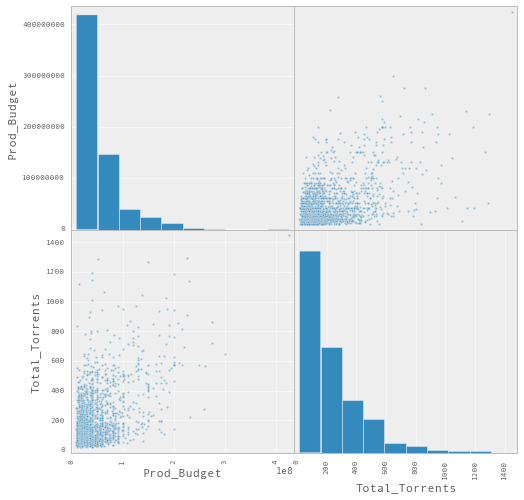

In [464]:
# Lets take a look at our entire model
pd.tools.plotting.scatter_matrix(df_sub)

In [465]:
from patsy import dmatrices

y, x = dmatrices('Total_Torrents ~ Prod_Budget + Genre', data=df_sub, return_type='dataframe')

In [466]:
y.head()

,Total_Torrents
0,1450.0
1,647.0
2,861.0
3,723.0
4,563.0


In [467]:
x.head()

,Intercept,"Genre[T.Action, Adventure]","Genre[T.Action, Adventure, Biography]","Genre[T.Action, Adventure, Comedy]","Genre[T.Action, Adventure, Crime]","Genre[T.Action, Adventure, Drama]","Genre[T.Action, Adventure, Family]","Genre[T.Action, Adventure, Fantasy]","Genre[T.Action, Adventure, History]","Genre[T.Action, Adventure, Horror]",...,"Genre[T.Horror, Mystery, Thriller]","Genre[T.Horror, Sci-Fi]","Genre[T.Horror, Sci-Fi, Thriller]","Genre[T.Horror, Thriller]","Genre[T.Mystery, Sci-Fi, Thriller]","Genre[T.Mystery, Thriller]","Genre[T.Romance, Sci-Fi, Thriller]","Genre[T.Sci-Fi, Adventure, Action]","Genre[T.Sci-Fi, Thriller]",Prod_Budget
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,425000000.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300000000.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275000000.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275000000.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,260000000.0


In [468]:
import statsmodels.api as sm

model = sm.OLS(y, x)
results = model.fit()

#results.summary()

In [469]:
import statsmodels.formula.api as smf

results = smf.ols(formula='Total_Torrents ~ Prod_Budget + Genre', data=df_sub,).fit()

#results.summary()

In [470]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [471]:
model.score(x, y)

0.39373443479834863

In [472]:
#model.coef_

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cc2d588>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12539bd30>]], dtype=object)

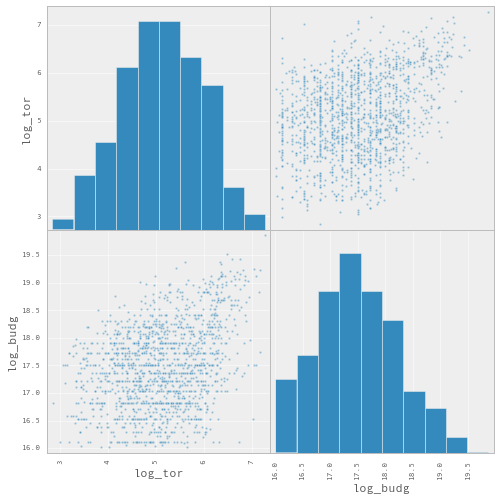

In [473]:
#data.yr=data.yr.replace({0:.25})

df_sub['log_tor']=np.log(df_sub.Total_Torrents)
df_sub['log_budg']=np.log(df_sub.Prod_Budget)

trans=df_sub[['log_tor','log_budg']]
pd.tools.plotting.scatter_matrix(trans)

In [474]:
y, x = dmatrices('log_tor ~ log_budg + Genre', data=df_sub, return_type='dataframe')
x.head()

,Intercept,"Genre[T.Action, Adventure]","Genre[T.Action, Adventure, Biography]","Genre[T.Action, Adventure, Comedy]","Genre[T.Action, Adventure, Crime]","Genre[T.Action, Adventure, Drama]","Genre[T.Action, Adventure, Family]","Genre[T.Action, Adventure, Fantasy]","Genre[T.Action, Adventure, History]","Genre[T.Action, Adventure, Horror]",...,"Genre[T.Horror, Mystery, Thriller]","Genre[T.Horror, Sci-Fi]","Genre[T.Horror, Sci-Fi, Thriller]","Genre[T.Horror, Thriller]","Genre[T.Mystery, Sci-Fi, Thriller]","Genre[T.Mystery, Thriller]","Genre[T.Romance, Sci-Fi, Thriller]","Genre[T.Sci-Fi, Adventure, Action]","Genre[T.Sci-Fi, Thriller]",log_budg
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.867600
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.519293
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.432282
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.432282
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.376192


In [475]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

model.score(x,y)

0.33798890401075277

In [476]:
from sklearn import cross_validation as cv
from sklearn import metrics

x_train, x_test, y_train, y_test = cv.train_test_split(x,y,test_size=0.333,random_state=1234)

model = LinearRegression().fit(x_train, y_train)

In [477]:
sum_squares_regr= np.sum((model.predict(x_train) -np.mean(y_train))**2)
# estimated value of y - y_mean
total_sum_squares=np.sum((y_train-np.mean(y_train))**2)
r_squared = sum_squares_regr / total_sum_squares

print(sum_squares_regr)
print(total_sum_squares)
print(r_squared)

Exception: Data must be 1-dimensional

In [478]:
metrics.mean_squared_error(y_train,model.predict(x_train))

0.44641419519936099

In [479]:
#model.score(x_train, y_train)
metrics.mean_squared_error(y_test,model.predict(x_test))

0.72177567895291883

In [480]:
from sklearn.cross_validation import KFold
kf = KFold(len(df_sub), n_folds=5)

In [481]:
for train_index, test_index in kf:
    #X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    #y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    ## Fit on Train! 
    clf2 = LinearRegression().fit(x.iloc[train_index], y.iloc[train_index])
    # Score on Test! 
    #print(clf2.coef_, metrics.mean_squared_error(y.iloc[test_index], clf2.predict(x.iloc[test_index])))